# kNN Example
Author: @max_smith

In [57]:
%matplotlib inline

# Imports
import numpy as np

import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap

from sklearn import neighbors
from sklearn.datasets import load_iris

from scipy.stats import mode

We're going to use a sub-set of the features of the Iris dataset. Only using two dimensions allows the feature space to be much more intuitive to visualize.

In [12]:
# Load data
iris = load_iris()

X = iris.data[:, :2] # First two features
Y = iris.target

The following code plots out the Iris dataset, including the correct labels. There are 3 classes in this dataset.

(1.5, 4.9000000000000004)

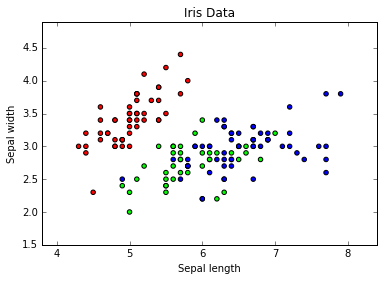

In [66]:
# Plot data
# Plotting feature 1 (f1) on the x-axis, and feature 2 (f2) on the y-axis
f1_min = X[:, 0].min() - 0.5
f1_max = X[:, 0].max() + 0.5
f2_min = X[:, 1].min() - 0.5
f2_max = X[:, 1].max() + 0.5

# Create & clear figure
plt.figure()
plt.clf()

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)

# Labels
plt.title('Iris Data')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Bounds
plt.xlim(f1_min, f1_max)
plt.ylim(f2_min, f2_max)

In [62]:
# KNN - train
k = 5
model = neighbors.KNeighborsClassifier(n_neighbors=k)
model.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [63]:
# KNN - test
preds = model.predict(X[:, 0:2])

Total correct:  125
Total data points:  150
Accuracy:  0.833333333333


(1.5, 4.9000000000000004)

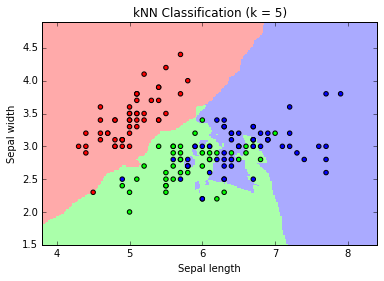

In [67]:
# Results
print('Total correct: ', sum(preds == Y))
print('Total data points: ', Y.shape[0])
print('Accuracy: ', sum(preds == Y)/Y.shape[0])

# Class Map
step_size = 0.02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

xx, yy = np.meshgrid(np.arange(f1_min, f1_max, step_size),
                     np.arange(f2_min, f2_max, step_size))
color_mesh = model.predict(np.c_[xx.ravel(), yy.ravel()])
color_mesh = color_mesh.reshape(xx.shape)

plt.figure()
plt.clf()
plt.pcolormesh(xx, yy, color_mesh, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)

plt.title('kNN Classification (k = %i)' %(k))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(f1_min, f1_max)
plt.ylim(f2_min, f2_max)